
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,49.08,49.38,18.67,16.10,18.79,16.03,10.64,18.28,18.67,1.02
1,DIA,DJIA ETF,US Stocks:Large Cap,19.02,34.08,9.18,10.94,17.58,13.91,9.64,18.42,9.18,0.50
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,111.91,83.09,44.62,29.38,29.46,19.89,11.73,20.09,44.62,2.22
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,65.29,69.59,23.20,17.27,19.75,15.86,10.14,19.22,23.20,1.21
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,161.73,204.12,36.75,16.85,20.75,20.07,9.25,25.71,36.75,1.43
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,78.49,114.99,23.05,13.05,17.07,18.33,11.17,23.47,23.05,0.98
6,IWD,Russell 1000 Value ETF,US Stocks:Value,31.23,59.95,7.10,8.78,13.33,16.11,10.70,19.54,7.10,0.36
7,IWF,Russell 1000 Growth ETF,US Stocks,85.48,61.99,34.97,24.57,25.03,17.81,10.75,19.35,34.97,1.81
8,RSP,S&P 500 Equal Weight ETF,US Stocks,37.45,67.70,16.09,12.86,16.64,15.11,9.84,21.23,16.09,0.76
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,140.83,198.92,28.83,14.19,18.80,19.00,9.86,26.09,28.83,1.11


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
16,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,117.91,72.23,38.23,30.66,30.96,19.14,10.29,21.03,38.23,1.82
21,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,16.55,54.51,30.59,20.03,21.60,21.03,12.95,21.44,30.59,1.43
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,-31.17,35.09,25.59,9.90,16.21,19.58,12.93,20.76,25.59,1.23
20,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,3.12,26.10,14.89,14.37,15.02,13.97,10.79,15.88,14.89,0.94
15,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,8.47,30.29,8.72,8.52,15.46,17.26,10.50,23.31,8.72,0.37
17,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,-9.03,-3.25,4.48,9.62,8.79,12.22,8.80,13.56,4.48,0.33
14,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,7.94,88.63,3.88,6.20,16.87,21.76,12.71,23.60,3.88,0.16
18,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,148.25,21.11,-4.11,12.08,10.94,14.23,5.84,15.72,-4.11,-64.61
19,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,0.00,-18.73,-7.23,12.26,10.11,15.61,9.86,13.21,-7.23,-95.51
13,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,49.41,222.48,-13.17,-8.21,0.60,35.41,20.14,39.29,-13.17,-517.45


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLK,XLY,XLB,XLV,XLI,XLP,XLF,XLRE,XLU,XLE,All S&P500 Sectors Portfolio
Annual Returns,38.23,30.59,25.59,14.89,8.72,4.48,3.88,-4.11,-7.23,-13.17,9.42
Std Dev,21.03,21.44,20.76,15.88,23.31,13.56,23.60,15.72,13.21,39.29,17.60
Sharpe Ratio,1.82,1.43,1.23,0.94,0.37,0.33,0.16,-64.61,-95.51,-517.45,0.54
Weight,0.10,0.08,0.08,0.10,0.10,0.12,0.08,0.18,0.11,0.05,1.00
Worst Typical Down Year,-3.83,-12.29,-15.93,-16.87,-37.90,-22.64,-43.32,-35.55,-33.65,-91.75,-25.78
Black Swan,-24.86,-33.73,-36.69,-32.75,-61.21,-36.20,-66.92,-51.27,-46.86,-131.04,-43.38


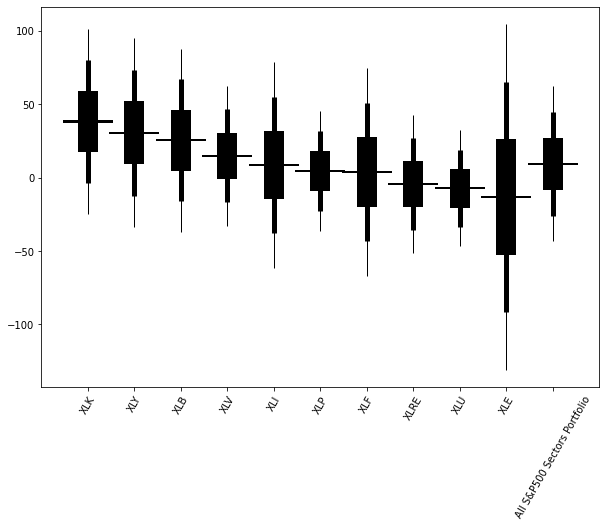

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

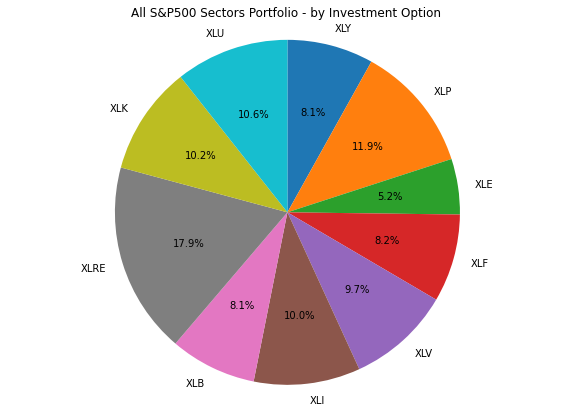

XLY    0.08
XLP    0.12
XLE    0.05
XLF    0.08
XLV    0.10
XLI    0.10
XLB    0.08
XLRE   0.18
XLK    0.10
XLU    0.11



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLK                            0.1018
    XLY                            0.0809
    XLB                            0.0810
    XLV                            0.0971
    XLI                            0.0998
    XLP                            0.1191
    XLF                            0.0824
    XLRE                           0.1794
    XLU                            0.1063
    XLE                            0.0520


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer........

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      1.31
    annual_return                        25.97
    std_dev                              19.89
    worst typical down year             -13.81
    black_swan                          -33.70


All S&P500 Sectors Portfolio Weights:
    XLK                            0.3600
    XLY                            0.3800
    XLB                            0.0000
    XLV                            0.0000
    XLI                            0.1000
    XLP                            0.0000
    XLF                            0.0700
    XLRE                           0.0300
    XLU                            0.0600
    XLE                            0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).